<a href="https://colab.research.google.com/github/PreciousTh/Neural_Network_Classifier_for_MNIST_Handwritten_Digits_Dataset/blob/main/Neural_Network_Classifier_for_MNIST_Handwritten_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



# **Data Preprocessing**

## **Loading** **Dataset**

In [155]:
# Importing the mnist dataset
mnist = tf.keras.datasets.mnist
hand_dataset = mnist.load_data()


## **Preprocessing**

### **Exploring data**

In [156]:
# Dividing the data into train and test datasets
(x_train, y_train), (x_test, y_test) = hand_dataset

In [157]:
# Printing the shape of data
x_train.shape

(60000, 28, 28)

In [158]:
image = 0
print(y_train[image])

5


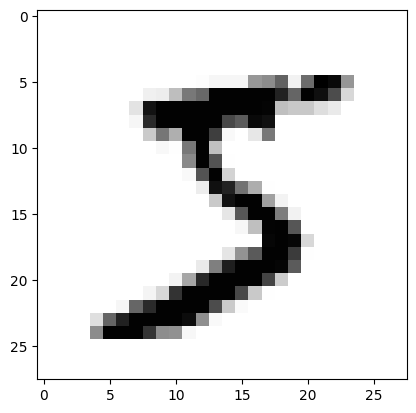

In [159]:
plt.imshow(x_train[0],cmap="Greys")

In [160]:
# Printing the data before normalization
print(x_train[image])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### **Normalization of data**

### **Resizing Image to enable convoluation operation**

In [161]:
img_rows=28
img_cols = 28
channels = 1
filters = 32
kernel_size = (3,3)
input_shape = (img_rows,img_cols,channels)

# reshaping for kernel operation
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,channels)
# reshaping for kernel operation
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,channels)
# Printing the outcomes
print("Training sample dimension", x_train.shape)
print("Training sample dimension", x_test.shape)

Training sample dimension (60000, 28, 28, 1)
Training sample dimension (10000, 28, 28, 1)


### **Normalization**

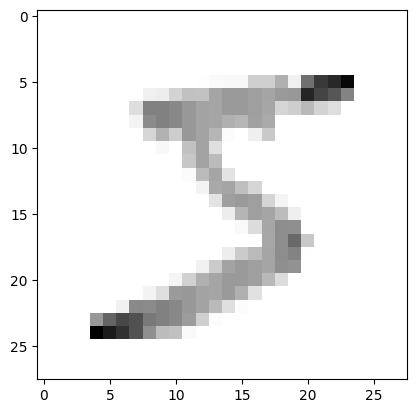

In [164]:
# normalize data
x_train = tf.keras.utils.normalize(x_train,axis =1 )
x_test = tf.keras.utils.normalize(x_test,axis =1 )
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [165]:
# Print data after normalization
print(x_train[image][7])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.12250613]
 [0.45858525]
 [0.45852825]
 [0.43408872]
 [0.37314701]
 [0.33153488]
 [0.32790981]
 [0.36833534]
 [0.3689874 ]
 [0.34978968]
 [0.32420121]
 [0.15214552]
 [0.17865984]
 [0.25626376]
 [0.1573102 ]
 [0.12298801]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


# **Data Modeling**

## **Creating the Deep Neural Network Model Artichecture**

In [166]:
x_train.shape

(60000, 28, 28, 1)

In [167]:
# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and a 3x3 kernel
model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=input_shape))

### Pooling Layers

In [168]:
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(64, kernel_size, activation='relu'))

# Add a third convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(128, kernel_size, activation='relu'))

# Add a second max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

### Full Connected Layers

In [170]:
# Flatten the input for dense layers
model.add(Flatten())

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# Add the output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

### Preparing data for Training

In [171]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Model Training and Validation**

## **Train a Model**

In [172]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.7274 - accuracy: 0.7140 - val_loss: 0.2306 - val_accuracy: 0.8886
Epoch 2/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1755 - accuracy: 0.9557 - val_loss: 0.0601 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.1025 - accuracy: 0.9763 - val_loss: 0.0481 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0835 - accuracy: 0.9809 - val_loss: 0.0403 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0673 - accuracy: 0.9847 - val_loss: 0.0362 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0591 - accuracy: 0.9864 - val_loss: 0.0431 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0487 - accuracy: 0.9884 - val_loss: 0

## **Visualize the Training History**

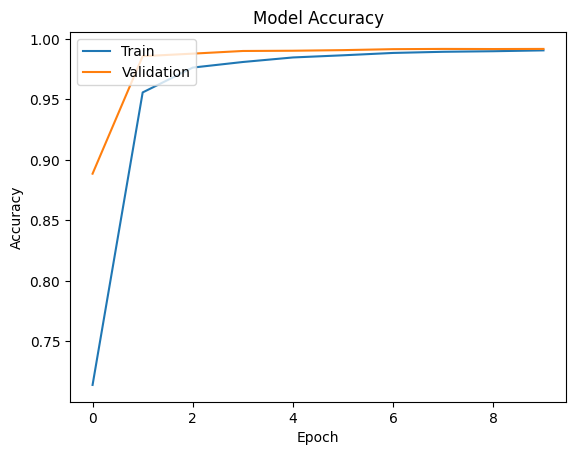

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Model Evaluation and Testing**

## **Evaluating the model**

In [175]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 6s 19ms/step - loss: 0.0384 - accuracy: 0.9917
Test Loss: 0.03842181712388992
Test Accuracy: 0.9916999936103821


## **Test the Model**

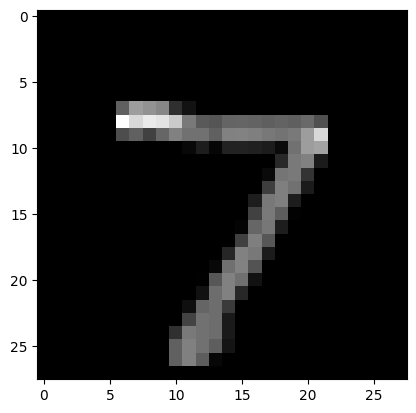

In [180]:
new_image = 0
# Visualizing the image
plt.imshow(x_test[new_image].reshape(28, 28), cmap='gray')


In [181]:
# Applying our model to predict the image
pred = model.predict(x_test[new_image].reshape(1, img_rows,img_cols, 1))

1/1 [==============================] - 0s 148ms/step


In [182]:
#print prediction
print(pred.argmax())

7
